<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_ProjetoModulo1/blob/main/Notebooks/1_AnaliseBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Módulo 1 - Análise de algumas informações da base de produção hospitalardo do SUS - Visão Brasil
Olá, bem vindo!

Como explicado no README busquei informações no DataSUS de procedimentos hospitalares (internações, gastos e óbitos), por mês de atendimento. As 3 foram baixadas no intervalo de processamento de Jan/2010 até set/2021. 

Também busquei as informações da população no IBGE, não consegui encontrar as informações mensais, apenas as anuais.

Para começar vou importar as bibibliotecas que costumo utilizar e setar algumas configurações padrão que utilizo para facilitar as vizualizações futuras.

>*OBS.: utilizo o padrão de tela com fundo preto, o que influencia na escolha das cores dos gráficos*

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format

In [2]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'lightgrey'
plt.rcParams['text.color'] = 'black'

Agora começo a importar as bases do DataSUS e fazer um tratamento, com base no que já conheço de padrão dessas bases, incluindo Região e ajustando as informações no campo de Unidade da Federação

In [3]:
# Criando base de código da região utilizado no DataSUS, conforme padrão já identificado nas aulas e explorações anteriores
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")


In [4]:
# carregando a base de quantidade de internações
internacoes = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/main/Bases/internacoes.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
internacoes["Cod_Região"]=internacoes["Unidade da Federação"].str[0] # criando o campo do códgio da região
internacoes = internacoes.join(Base_regioes, on="Cod_Região") # inclui os nomes das regiões em dados
internacoes["Unidade da Federação"] = internacoes["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
internacoes["Unidade da Federação"] = internacoes["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
internacoes = internacoes.set_index(["Unidade da Federação"]) # definindo UF como índice
internacoes.info() # verificando o que temos

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 155 entries, 2009/Fev to Região
dtypes: int64(146), object(9)
memory usage: 32.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [5]:
# carregando a base de gastos
gastos = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/main/Bases/gastos.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
gastos["Cod_Região"]=gastos["Unidade da Federação"].str[0] # criando o campo do códgio da região
gastos = gastos.join(Base_regioes, on="Cod_Região") # trazendo os nomes das regiões para a base
gastos["Unidade da Federação"] = gastos["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
gastos["Unidade da Federação"] = gastos["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
gastos = gastos.set_index("Unidade da Federação") # definindo UF como índice
gastos.info() # verificando o que temos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 278 entries, 1992/Mar to Região
dtypes: float64(146), object(132)
memory usage: 58.9+ KB


In [6]:
# carregando a base de quantidade de óbitos
obitos = pd.read_csv("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/obitos.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
obitos["Cod_Região"]=obitos["Unidade da Federação"].str[0] # criando o campo do códgio da região
obitos = obitos.join(Base_regioes, on="Cod_Região") # inclui os nomes das regiões em dados
obitos["Unidade da Federação"] = obitos["Unidade da Federação"].str.replace("\d+", "") # retirando os números do nome dos estados
obitos["Unidade da Federação"] = obitos["Unidade da Federação"].str.strip() # retirando os espaços antes e depois dos nomes
obitos = obitos.set_index("Unidade da Federação") # definindo UF como índice
obitos.info() # verificando o que temos

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 170 entries, 1998/Set to Região
dtypes: int64(145), object(25)
memory usage: 36.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


Conseguimos ver que nem todas as tabelas tem a mesma quantidade de meses e temos alguns deles que não tem informação numérica para todos os estados. Fora isso, levando em conta avaliações anteriores nas aulas, sabemos que os últimos meses costumam não ter uma boa informação por data de atendimento, pois ela é complementada com entradas dos meses de processamento seguinte.

Desta forma, decidi restringir as análises para os últimos 7 anos (2014 até 2020), perído suficiente para avaliarmos tendências, bem como incluir o primeiro semestre de 2021 para identificar como foi esse primeiro semestre com a pandemia de covid-19 no seu auge dentro do Brasil. 

Agora, faremos esse corte e verificaremos se as bases, após o corte terão as informações completas para todos os estados.

In [7]:
anos = [2014,2015,2016,2017,2018,2019,2020,2021] # anos selecionados
# cria tabela de meses e trimestres
MesTri = pd.DataFrame({"Tri": ["1ºTri","1ºTri","1ºTri","2ºTri","2ºTri","2ºTri","3ºTri","3ºTri","3ºTri","4ºTri","4ºTri","4ºTri"],
                       "Mes": ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out", "Nov", "Dez"]}).set_index("Mes") 
# cria a lista com todos os anos, meses e trimestres para permitir olhar de forma mais agrupada os dados
selecao = []
for ano in anos:
  for mes in MesTri.index:
    selecao = selecao + [[str(ano)+"/"+mes,str(ano)+"/"+MesTri.loc[mes]["Tri"], str(ano), MesTri.loc[mes]["Tri"], mes]]

selecao = pd.DataFrame(selecao, columns=["AnoMes","AnoTri","Ano","Tri","Mes"]).set_index("AnoMes") # transforma a lista em um dataframe
selecao = selecao[:-6] # retira o último semestre de 2021 por sabermos que os últimos meses não são tão completos
selecao

,AnoTri,Ano,Tri,Mes
AnoMes,,,,
2014/Jan,2014/1ºTri,2014,1ºTri,Jan
2014/Fev,2014/1ºTri,2014,1ºTri,Fev
2014/Mar,2014/1ºTri,2014,1ºTri,Mar
2014/Abr,2014/2ºTri,2014,2ºTri,Abr
2014/Mai,2014/2ºTri,2014,2ºTri,Mai
...,...,...,...,...
2021/Fev,2021/1ºTri,2021,1ºTri,Fev
2021/Mar,2021/1ºTri,2021,1ºTri,Mar
2021/Abr,2021/2ºTri,2021,2ºTri,Abr


Agora vamos verificar com ficaram as bases com esse corte definido

In [8]:
internacoes[selecao.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 90 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   2014/Jan  27 non-null     int64
 1   2014/Fev  27 non-null     int64
 2   2014/Mar  27 non-null     int64
 3   2014/Abr  27 non-null     int64
 4   2014/Mai  27 non-null     int64
 5   2014/Jun  27 non-null     int64
 6   2014/Jul  27 non-null     int64
 7   2014/Ago  27 non-null     int64
 8   2014/Set  27 non-null     int64
 9   2014/Out  27 non-null     int64
 10  2014/Nov  27 non-null     int64
 11  2014/Dez  27 non-null     int64
 12  2015/Jan  27 non-null     int64
 13  2015/Fev  27 non-null     int64
 14  2015/Mar  27 non-null     int64
 15  2015/Abr  27 non-null     int64
 16  2015/Mai  27 non-null     int64
 17  2015/Jun  27 non-null     int64
 18  2015/Jul  27 non-null     int64
 19  2015/Ago  27 non-null     int64
 20  2015/Set  27 non-null     int64
 21  2015/Out  27 non-null    

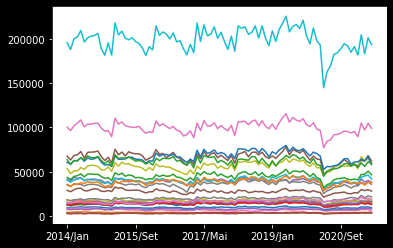

In [9]:
internacoes[selecao.index].T.plot(legend=False)

In [10]:
gastos[selecao.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 90 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2014/Jan  27 non-null     float64
 1   2014/Fev  27 non-null     float64
 2   2014/Mar  27 non-null     float64
 3   2014/Abr  27 non-null     float64
 4   2014/Mai  27 non-null     float64
 5   2014/Jun  27 non-null     float64
 6   2014/Jul  27 non-null     float64
 7   2014/Ago  27 non-null     float64
 8   2014/Set  27 non-null     float64
 9   2014/Out  27 non-null     float64
 10  2014/Nov  27 non-null     float64
 11  2014/Dez  27 non-null     float64
 12  2015/Jan  27 non-null     float64
 13  2015/Fev  27 non-null     float64
 14  2015/Mar  27 non-null     float64
 15  2015/Abr  27 non-null     float64
 16  2015/Mai  27 non-null     float64
 17  2015/Jun  27 non-null     float64
 18  2015/Jul  27 non-null     float64
 19  2015/Ago  27 non-null     float64
 20  2015/Set  27 non-n

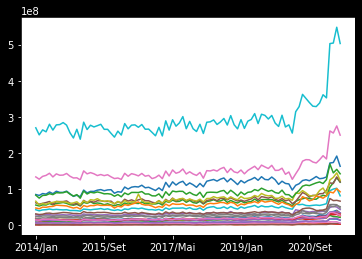

In [11]:
gastos[selecao.index].T.plot(legend=False)

In [12]:
obitos[selecao.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 90 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   2014/Jan  27 non-null     int64
 1   2014/Fev  27 non-null     int64
 2   2014/Mar  27 non-null     int64
 3   2014/Abr  27 non-null     int64
 4   2014/Mai  27 non-null     int64
 5   2014/Jun  27 non-null     int64
 6   2014/Jul  27 non-null     int64
 7   2014/Ago  27 non-null     int64
 8   2014/Set  27 non-null     int64
 9   2014/Out  27 non-null     int64
 10  2014/Nov  27 non-null     int64
 11  2014/Dez  27 non-null     int64
 12  2015/Jan  27 non-null     int64
 13  2015/Fev  27 non-null     int64
 14  2015/Mar  27 non-null     int64
 15  2015/Abr  27 non-null     int64
 16  2015/Mai  27 non-null     int64
 17  2015/Jun  27 non-null     int64
 18  2015/Jul  27 non-null     int64
 19  2015/Ago  27 non-null     int64
 20  2015/Set  27 non-null     int64
 21  2015/Out  27 non-null    

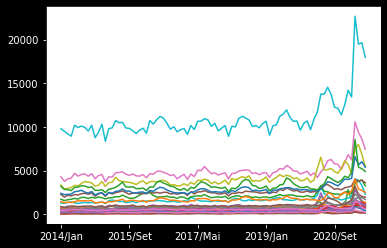

In [13]:
obitos[selecao.index].T.plot(legend=False)

Pelos resultados conseguimos verificar que nesse corte todas as bases estão com as informações completas e pelos gráficos já vemos compartamentos no todo interessantes de serem investigados o que faremos abaixo

Mas antes disso, vamos pegar trazer as informações de população que temos para podermos enxergar os dados de forma relativa

In [14]:
# pegando base de tamanho da população de 2001 até 2020 e fazendo alguns tratamentos nas colunas e linhas
populacao = pd.read_excel("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/PopulacaoAnual_2001_2020.xls", skiprows=4, skipfooter=10)
populacao = populacao.drop([0, 1]) # excluindo as colunas que não tem informação relevante
populacao = populacao.set_index("Unidades da Federação") # definindo o índice
# excluindo as linhas de Regiões
Regioes = [i for i in populacao.index if "Região" in i] # selecionando as regiões
populacao = populacao.drop(index=Regioes) # excluindo as regiões
populacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    27 non-null     float64
 1   2002    27 non-null     float64
 2   2003    27 non-null     float64
 3   2004    27 non-null     float64
 4   2005    27 non-null     float64
 5   2006    27 non-null     float64
 6   2007    27 non-null     float64
 7   2008    27 non-null     float64
 8   2009    27 non-null     float64
 9   2010    27 non-null     float64
 10  2011    27 non-null     float64
 11  2012    27 non-null     float64
 12  2013    27 non-null     float64
 13  2014    27 non-null     float64
 14  2015    27 non-null     float64
 15  2016    27 non-null     float64
 16  2017    27 non-null     float64
 17  2018    27 non-null     float64
 18  2019    27 non-null     float64
 19  2020    27 non-null     float64
dtypes: float64(20)
memory usage: 4.4+ KB


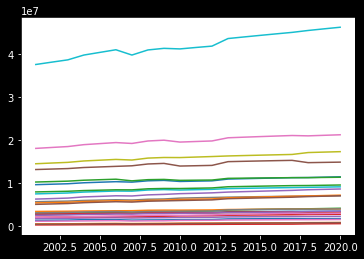

In [15]:
populacao.T.plot(legend=False)

Aparentemente as informações estão ok. Agora vamos pegar a base de 2021 também

In [16]:
# pegando base de tamanho da população de 2021 e fazendo alguns tratamentos nas colunas e linhas
populacao21 = pd.read_excel("https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo1/raw/main/Bases/PopulacaoAnual_2021.xls", skiprows=2, skipfooter=7)
populacao21 = populacao21.rename(columns={"Brasil":"UF", 213317639:"2021/Jul"}) # alterando o nome das colunas
populacao21 = populacao21.set_index("UF") # definindo o índice
# excluindo as linhas que não são UFs
Regioes = [i for i in populacao21.index if "Região" in i] # selecionando as regiões
populacao21 = populacao21.drop(index=Regioes, columns=["Unnamed: 1"]) # excluindo as regiões e a coluna que não tem informação relevante
populacao21.tail()

,2021/Jul
UF,
Rio Grande do Sul,11466630
Mato Grosso do Sul,2839188
Mato Grosso,3567234
Goiás,7.206.589(4)
Distrito Federal,3.094.325(4)


Pela tabela acima percebemos que temos que retirar alguns caracteres do campo de informação para ajusta-la e também transforma-la em um campo numérico

In [17]:
# retirando os caracteres que estão poluindo as informação
populacao21["2021/Jul"] = populacao21["2021/Jul"].astype(str) # transforma o campo em string
populacao21["2021/Jul"] = populacao21["2021/Jul"].str.replace("\(\d\)","") # removemos os itens do tipo: (1), (2), etc.
populacao21["2021/Jul"] = populacao21["2021/Jul"].str.replace("\D","") # removemos os .
populacao21["2021/Jul"] = populacao21["2021/Jul"].astype(float) # transformamos em número
populacao21.tail()

,2021/Jul
UF,
Rio Grande do Sul,"11,466,630.00"
Mato Grosso do Sul,"2,839,188.00"
Mato Grosso,"3,567,234.00"
Goiás,"7,206,589.00"
Distrito Federal,"3,094,325.00"


In [18]:
populacao21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2021/Jul  27 non-null     float64
dtypes: float64(1)
memory usage: 432.0+ bytes


Agora a base de populacao de 2021 está ok.

Porém, dado que as informações populacionais são anuais, decide fazer as análises evolutivas por trimestre para reduzir as possíveis distorção pela interpolação dos dados populacionais e, ao mesmo tempo, matendo algum tipo de sazonalidade para avaliarmos.

Aqui vale destacar que analisando o site do IBGE (https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?edicao=17283&t=downloads) percebi que os dados anuais da serie histórica de 2001 até 2020 são consolidadas a partir das estimativas realizadas sempre na metade do ano, portanto seriam a posição de fechamento do primeiro semestre e não do ano em si. Desta forma, irei sempre considera-los como o valor do 2º Trimestre do ano em questão

In [19]:
# comecando a criação da base de população por trimestre, primeiro copiando a base de 2021, alterando o nome da coluna
populacaoTri = populacao21.rename(columns={"2021/Jul":"2021/2ºTri"})
populacaoTri["2021/1ºTri"] = np.nan # adicionando o 1ºTri de 2021 vazio
# criando um campo de anos com um ano anterior a selecao para permitir a interpolação posterior
selAnos = [anos[0]-1]
selAnos = selAnos + [int(ano) for ano in anos]
# criando uma lista de trimestres a partir da base MesTri, eliminando as duplicidades
tris = [tri for tri in MesTri["Tri"]]
tris = list(dict.fromkeys(tris)) # elimina as duplicidades
for ano in populacao.columns:
  if ano in selAnos:
    for tri in tris:
      if tri == "2ºTri":
        populacaoTri[str(ano)+"/2ºTri"] = populacao[ano] # se for o 2ºTri pega o valor do ano
      else:
        populacaoTri[str(ano)+"/"+tri] = np.nan # se não deixa vazio
populacaoTri = populacaoTri.T.reset_index() # tranpondo a base
populacaoTri = populacaoTri.rename(columns={"index":"AnoTri"}) # nomeando a coluna de AnoTri 
populacaoTri = populacaoTri.set_index("AnoTri") # definindo ela como índice
populacaoTri = populacaoTri.sort_index() # ordenando por ela
populacaoTri = populacaoTri.interpolate() # interpolando a base
populacaoTri = populacaoTri[4:] # removendo o ano anterior que está fora do período selecionado
populacaoTri.head() # vendo o resultado

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
AnoTri,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014/1ºTri,"1,743,451.75","786,691.50","3,857,287.50","494,720.00","8,047,856.50","746,933.00","1,492,201.00","6,836,738.25","3,192,080.00","8,826,737.25","3,399,872.25","3,936,519.00","9,260,432.75","3,316,531.25","2,213,596.00","15,105,812.50","20,698,911.75","3,873,628.25","16,438,174.50","43,942,395.25","11,060,635.25","6,703,924.50","11,196,466.25","2,611,560.00","3,213,796.00","6,500,928.50","2,836,719.25"
2014/2ºTri,"1,748,531.00","790,101.00","3,873,743.00","496,936.00","8,073,924.00","750,912.00","1,496,880.00","6,850,884.00","3,194,718.00","8,842,791.00","3,408,510.00","3,943,885.00","9,277,727.00","3,321,730.00","2,219,574.00","15,126,371.00","20,734,097.00","3,885,049.00","16,461,173.00","44,035,304.00","11,081,692.00","6,727,148.00","11,207,274.00","2,619,657.00","3,224,357.00","6,523,222.00","2,852,372.00"
2014/3ºTri,"1,753,449.25","793,454.00","3,889,891.25","499,118.25","8,099,221.25","754,853.75","1,501,441.50","6,864,223.25","3,197,045.50","8,858,208.00","3,416,926.25","3,950,964.25","9,294,588.50","3,326,530.50","2,225,414.75","15,145,761.75","20,767,848.00","3,896,264.50","16,483,385.75","44,125,599.00","11,102,023.50","6,750,158.50","11,217,448.50","2,627,551.50","3,234,639.25","6,545,086.75","2,867,986.50"
2014/4ºTri,"1,758,367.50","796,807.00","3,906,039.50","501,300.50","8,124,518.50","758,795.50","1,506,003.00","6,877,562.50","3,199,373.00","8,873,625.00","3,425,342.50","3,958,043.50","9,311,450.00","3,331,331.00","2,231,255.50","15,165,152.50","20,801,599.00","3,907,480.00","16,505,598.50","44,215,894.00","11,122,355.00","6,773,169.00","11,227,623.00","2,635,446.00","3,244,921.50","6,566,951.50","2,883,601.00"
2015/1ºTri,"1,763,285.75","800,160.00","3,922,187.75","503,482.75","8,149,815.75","762,737.25","1,510,564.50","6,890,901.75","3,201,700.50","8,889,042.00","3,433,758.75","3,965,122.75","9,328,311.50","3,336,131.50","2,237,096.25","15,184,543.25","20,835,350.00","3,918,695.50","16,527,811.25","44,306,189.00","11,142,686.50","6,796,179.50","11,237,797.50","2,643,340.50","3,255,203.75","6,588,816.25","2,899,215.50"


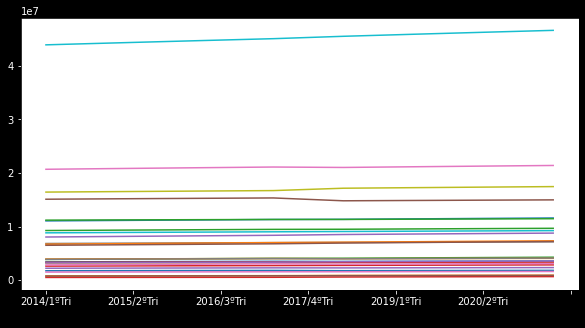

In [20]:
populacaoTri.plot(legend=False, figsize=(10,5))

Agora temos uma base de população por trimestre, lembrando que apenas dos dados do 2º Tri de cada ano são do IBGE, os demais foram obtidos pela interpolação. Outro destaque é uma pequena oscilação no ano de 2018, na planilha diz que houve uma revisão na metodologia nesse ano e a anterior ocorreu em 2013 o que pode explicar a oscilação ocorrer apenas nesse período.

Agora vamos voltar as bases iniciais e deixa-las no mesmo formato por trimestre e apenas com os anos que queremos.

In [21]:
# criando a base por trimestre de internações
triInternacoes = internacoes.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triInternacoes = triInternacoes.groupby(["AnoTri"],).sum() # agrupando por trimestre
triInternacoes = triInternacoes[triInternacoes.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triInternacoes.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
AnoTri,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014/1ºTri,27948,12604,36058,7772,124415,9306,25525,105292,53810,119068,38833,46740,129283,37814,22025,199068,298222,53349,151978,583393,181473,103828,184089,39148,45620,85795,45269
2014/2ºTri,29942,13801,37901,8003,125432,9047,26375,105344,53822,124178,41929,49412,137117,40565,22162,207042,313786,55795,158035,607864,189787,110044,191212,41931,47959,90990,47055
2014/3ºTri,30075,12825,39639,8454,124374,9256,26033,106706,53219,122528,40048,50131,141568,42278,22647,216277,311978,58044,170739,607837,194108,114422,199193,41574,47565,88772,45249
2014/4ºTri,29002,12971,39737,7964,118427,8427,24338,99775,49222,115447,38392,46660,133984,40016,22480,202575,299718,55762,159812,576256,184392,107008,188868,39727,45514,85549,41886
2015/1ºTri,27687,11881,41830,7897,117575,8085,21422,104492,50182,114944,37604,43915,131847,38124,23352,201213,296397,56369,165831,594908,181774,106597,187425,40394,44817,88862,41429


In [22]:
# criando a base por trimestre de gastos
triGastos = gastos.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triGastos = triGastos.groupby(["AnoTri"],).sum() # agrupando por trimestre
triGastos = triGastos[triGastos.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triGastos.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
AnoTri,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014/1ºTri,"19,148,849.49","8,518,167.54","27,624,085.03","4,922,710.16","86,766,061.83","6,041,654.50","21,053,976.61","75,644,382.70","41,422,637.08","126,771,750.45","45,575,725.19","48,086,874.73","167,136,658.82","45,914,641.36","21,126,054.27","182,592,208.74","397,822,485.21","59,836,965.28","184,398,655.43","784,762,913.70","256,679,533.90","145,045,066.15","242,205,222.10","42,639,999.84","40,175,985.37","93,153,130.40","46,946,133.62"
2014/2ºTri,"21,077,202.10","9,421,750.91","31,320,202.54","5,461,384.16","87,625,510.36","5,934,708.80","22,985,606.23","76,920,089.43","42,178,287.67","132,446,225.52","51,174,595.98","50,295,335.30","174,099,050.10","41,497,157.25","21,368,779.94","187,710,427.89","416,852,990.42","63,793,212.14","184,615,222.83","802,405,033.95","266,907,013.76","154,864,001.80","256,599,967.73","45,130,955.60","42,483,611.46","100,334,069.11","50,686,450.07"
2014/3ºTri,"21,166,209.71","8,753,890.40","32,693,157.94","5,548,250.09","87,862,804.71","5,827,307.42","22,986,006.94","78,473,164.47","43,775,300.03","131,034,743.54","50,462,037.36","50,423,316.74","186,309,348.98","44,770,909.33","21,773,465.98","198,155,625.89","420,690,390.46","66,650,260.99","196,351,338.99","841,454,815.07","277,451,233.86","166,355,900.83","271,207,747.89","46,421,808.02","42,293,282.41","103,584,495.45","44,851,757.14"
2014/4ºTri,"20,865,629.68","9,134,382.92","34,015,571.45","5,649,024.05","86,414,223.21","4,993,005.77","22,247,985.21","74,162,215.91","41,380,129.64","126,139,176.59","49,492,011.19","47,551,514.04","174,356,031.02","43,187,523.52","21,776,564.30","187,832,162.63","411,057,349.02","64,717,366.22","186,865,624.45","775,637,215.34","262,773,523.44","152,780,518.27","261,216,983.36","43,856,483.50","41,450,757.79","102,769,721.55","41,517,335.67"
2015/1ºTri,"21,109,354.53","9,081,827.01","36,893,076.68","5,409,552.79","87,151,740.33","5,182,214.57","19,648,354.86","76,006,189.45","41,081,422.06","125,742,839.10","49,249,565.65","45,875,729.78","176,445,276.04","42,022,998.52","23,445,352.00","185,584,628.93","408,664,682.43","65,267,941.49","191,153,310.33","789,949,394.44","260,876,492.72","150,541,196.25","255,702,817.74","44,823,282.71","41,714,995.72","103,309,928.77","41,225,834.69"


In [23]:
# criando a base por trimestre de obitos
triObitos = obitos.T.join(selecao, how="inner") # adicionando a informação de trimestre e filtrando os anos selecionados
triObitos = triObitos.groupby(["AnoTri"],).sum() # agrupando por trimestre
triObitos = triObitos[triObitos.columns[:-3]] # removendo colunas desnecessárias que vieram no join
triObitos.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
AnoTri,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014/1ºTri,718,272,751,134,2571,246,736,2235,1523,3918,1432,1947,4977,1362,767,6416,12138,1765,9221,28493,6935,4180,8878,1396,1607,2488,1396
2014/2ºTri,832,342,803,189,2584,268,714,2236,1529,3968,1465,1997,5290,1563,767,6579,13200,1798,9618,29077,7543,4323,8919,1455,1662,2754,1536
2014/3ºTri,732,293,795,179,2621,212,711,2194,1447,3976,1419,2068,5677,1619,812,7057,13540,1988,10970,29594,7713,4617,9590,1438,1638,2778,1476
2014/4ºTri,761,369,825,195,2522,207,711,2277,1447,4013,1386,1916,5789,1513,774,6844,13158,1933,10159,28364,7213,4248,8616,1395,1574,2698,1331
2015/1ºTri,726,320,965,180,2757,230,581,2300,1490,4175,1449,1854,5542,1328,933,6990,12570,2118,10573,28469,7107,4151,8189,1438,1575,2704,1362


Com as bases trimestrais podemos começar as relações entre elas para analisarmos. 

Para este notebook vou focar em análises mais gerais, olhando o Brasil como um todo, portanto vou agrupar as bases, criar as relações e começar a entender um pouco do cenário macro do Brasil.

In [24]:
triInternacoes["Brasil"] = triInternacoes.sum(axis=1) # cria a coluna Brasil na base de internações
triGastos["Brasil"] = triGastos.sum(axis=1) # cria a coluna Brasil na base de gastos
triObitos["Brasil"] = triObitos.sum(axis=1) # cria a coluna Brasil na base de obitos
populacaoTri["Brasil"] = populacaoTri.sum(axis=1) # cria a coluna Brasil na base de população

In [25]:
triIntHab = triInternacoes/populacaoTri # cria base de internações por habitante
triGastosHab = triGastos/populacaoTri # cria base de gastos por habitante
triObitosHab = triObitos/populacaoTri # cria base de obitos por habitante
triObitosInt = triObitos/triInternacoes # cria base de obitos por internações
triGastosInt = triGastos/triInternacoes # cria base de gastos por internações

Vamos agora começar a vizualizar esses dados, para isso primeiro vou setar as informações de eixo para que consigamos ver todos os trimestres no eixoX, em seguida vamos aos gráficos.

In [26]:
# define os labels do eixoX
labelEixoX = selecao["AnoTri"].tolist()
labelEixoX = list(dict.fromkeys(labelEixoX))
# define as posições que serão substituidas por esses labels
valoresEixoX = [i for i in range(0,len(labelEixoX))]

<function matplotlib.pyplot.show>

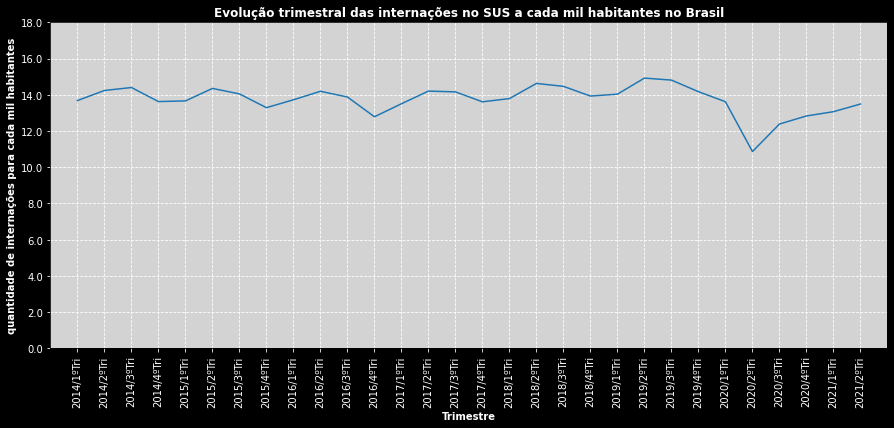

In [27]:
ax = triIntHab.plot(y="Brasil", figsize=(15,6), legend=False)
escalaY = 1e3
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,18/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("quantidade de internações para cada mil habitantes", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral das internações no SUS a cada mil habitantes no Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

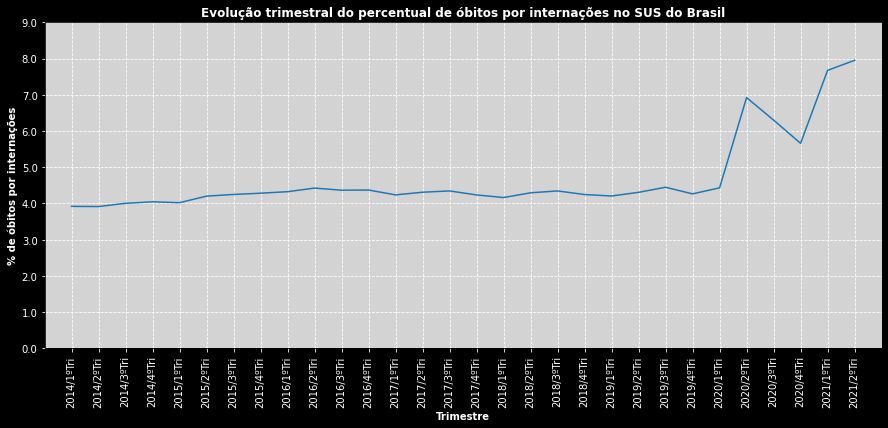

In [28]:
ax = triObitosInt.plot(y=["Brasil"], figsize=(15,6), legend=False)
escalaY = 1e2
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,9/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("% de óbitos por internações", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral do percentual de óbitos por internações no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

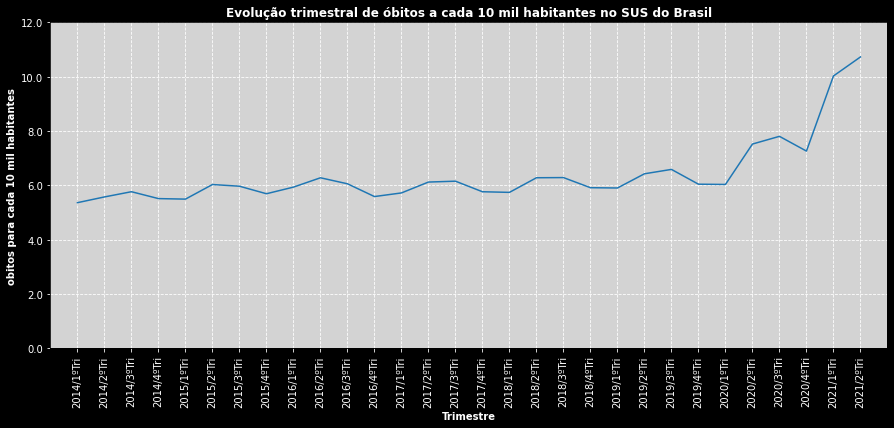

In [29]:
ax = triObitosHab.plot(y=["Brasil"], figsize=(15,6), legend=False)
escalaY = 1e4
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*escalaY)))
ax.set_ylim(0,12/escalaY)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("obitos para cada 10 mil habitantes", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral de óbitos a cada 10 mil habitantes no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

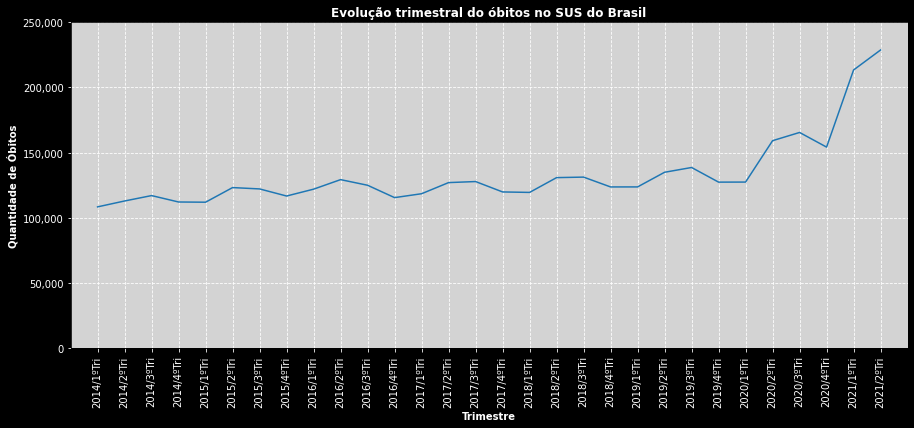

In [30]:
ax = triObitos.plot(y=["Brasil"], figsize=(15,6), legend=False)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/escalaY)))
ax.set_ylim(0,250000)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("Quantidade de Óbitos", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral do óbitos no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

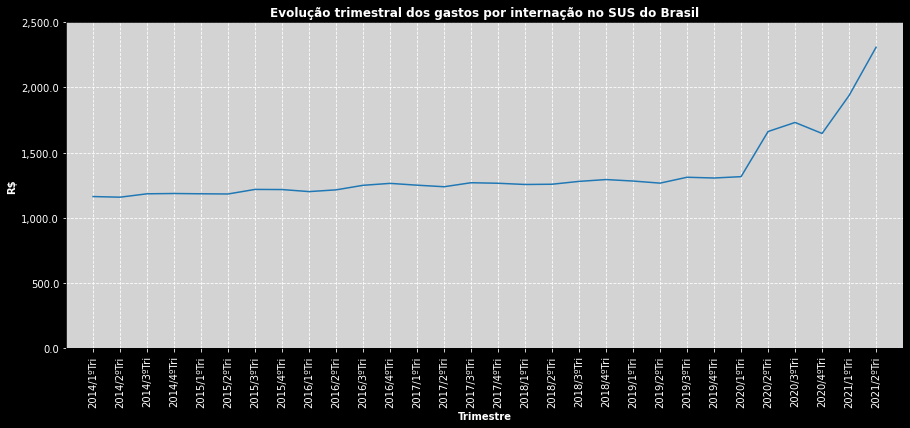

In [31]:
ax = triGastosInt.plot(y=["Brasil"], figsize=(15,6), legend=False)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.set_ylim(0,2500)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("R$", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral dos gastos por internação no SUS do Brasil", fontweight="bold", color="white")
plt.show

<function matplotlib.pyplot.show>

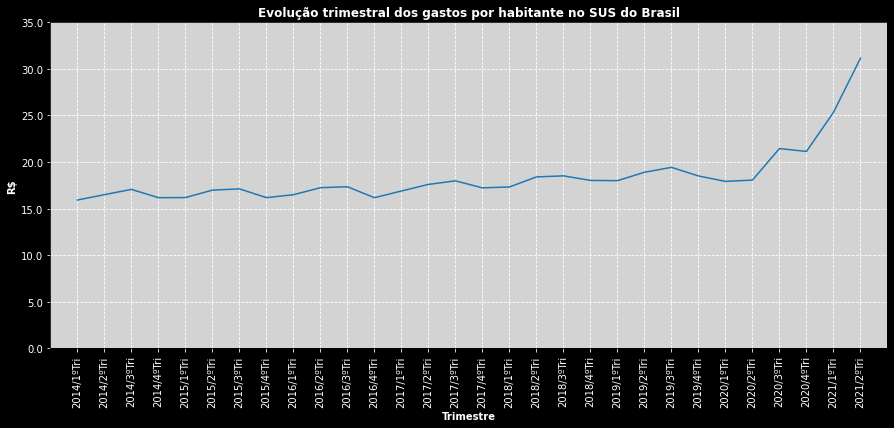

In [32]:
ax = triGastosHab.plot(y=["Brasil"], figsize=(15,6), legend=False)
escalaY = 1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.set_ylim(0,35)
ax.set_xlim(-1,len(labelEixoX))
ax.set_facecolor("lightgrey")
plt.grid(color='white', linestyle="--")
plt.xticks(valoresEixoX, labelEixoX, rotation=90)
plt.ylabel("R$", fontweight="bold", color="white")
plt.xlabel("Trimestre", fontweight="bold", color="white")
plt.title("Evolução trimestral dos gastos por habitante no SUS do Brasil", fontweight="bold", color="white")
plt.show

#Análise
Olhando os gráficos acima temos algumas coisas que nos chamam atenção e iremos explorar um pouco.

Primeiro podemos perceber nos anos anteriores a pandemia uma sazonalidade tanto de internações por habitante, quanto de óbitos, bem como do gasto por habitante, onde temos um aumento sempre no 2º e 3º trimestre. Vendo isso me lembrei de uma live do Atila Iamarino com Wanderson de Oliveira do dia 07/Jun/2020 (https://www.youtube.com/watch?v=BtVZ-Gxh8dE&list=PLRRpjE6bL5UxzWZ2T7Gt6pIlFdR4ig4YX) onde, no trecho de 1h e 11min até 1h e 30min, se explorou o comportamento padrão das doenças respiratórias no Brasil (recomendo especialmente o minuto da 1h 22 min até 23min que o Atila faz um resumo), o que poderia explicar esse comportamento. Valeria depois olhar alguma base por tipo de doença que poderia confirmar a avaliação.

Abaixo uma demonstração dessa sazonalidade em cima do dado de óbitos:


<function matplotlib.pyplot.show>

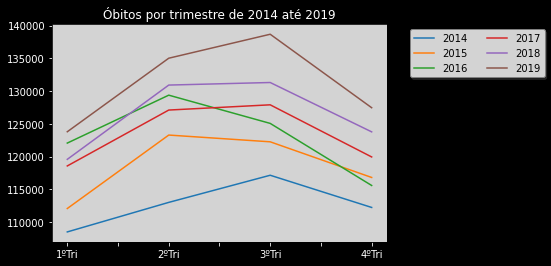

In [33]:
obitosSazonal = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triObitos.loc[str(ano)+"/"+tri]["Brasil"]]
    obitosSazonal = obitosSazonal + [dado]

obitosSazonal = pd.DataFrame(obitosSazonal, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
ax = obitosSazonal.T.plot()
ax.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
ax.set_facecolor("lightgrey")
plt.title("Óbitos por trimestre de 2014 até 2019", color="white")
plt.show


Continuando a análise dos gráficos anteriores. Além dessa sazonalidade analisada, vemos claramente o efeito da pandemia de covid-19 o que iremos explorar um pouco mais.

Preimeiro vemos que a partir do segundo trimestre de 2020 os gráficos de maneira geral se elevam e vemos que no 4º Tri temos uma leve redução para depois retormar com força no 1º Tri de 2021, seguindo o movimento que todos acompanhamos nos noticiários da pandemia. 

Um gráfico que foge desse comportamento é o gráfico de internaçoes por habitante, que até reduz a quantidade de internações. Isso provavelmente se explique pelas orientações de não procurarem os hospitais se não fosse uma situação grave para evitar a transmissão, por exemplo nessa reportagem: https://agora.folha.uol.com.br/sao-paulo/2020/04/saiba-quais-cuidados-tomar-para-ir-ao-hospital.shtml. Com isso a maior parte das internações devem ser por covid com uma redução relevante de outros tipos, principalmente de sirugias eletivas.

Agora algo vemos 2 gráficos que eram mais estáveis e mudam de patamar que era o de quantidade de óbitos por internação, que tinha uma taxa mais ou menos constante antes da pandemia. O mesmo acontece nos gastos por internação. Demonstrando o efeito relevante da pandemia tanto nos óbitos quanto nos gastos públicos com internações. 

Está avaliação me fez pensar o quanto aumentou os óbitos e os gastos com relação aos patamares anteriores. Vamos avaliar olhar isso agora:

In [34]:
mediaObitosTri = obitosSazonal.mean()
obitos2020e2021 = pd.DataFrame(triObitos.filter(regex="2020/2ºTri|2020/3ºTri|2020/4ºTri|2021/1ºTri|2021/2ºTri", axis=0)["Brasil"])
obitos2020e2021["Tri"] = obitos2020e2021.index.str[-5:]
mortesAcima = 0
print("Mortes Acima da Média dos Anos Anteriores no SUS")
for anoTri in obitos2020e2021.index:
  morteAcimaTri = obitos2020e2021.loc[anoTri]["Brasil"]-mediaObitosTri[obitos2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.1f}".format(morteAcimaTri)+
        " Ficando {:,.1%} acima da média deste Tri".format(morteAcimaTri/mediaObitosTri[obitos2020e2021.loc[anoTri]["Tri"]]))
  mortesAcima = mortesAcima + morteAcimaTri
print("Total: {:,.1f}".format(mortesAcima)+" Ficando {:,.1%} acima da média para o mesmo período"
.format(mortesAcima/(mediaObitosTri.sum()+mediaObitosTri["2ºTri"])))

Mortes Acima da Média dos Anos Anteriores no SUS
2020/2ºTri: 32,777.2 Ficando 25.9% acima da média deste Tri
2020/3ºTri: 38,470.8 Ficando 30.3% acima da média deste Tri
2020/4ºTri: 35,006.7 Ficando 29.3% acima da média deste Tri
2021/1ºTri: 95,998.0 Ficando 81.7% acima da média deste Tri
2021/2ºTri: 102,302.2 Ficando 80.9% acima da média deste Tri
Total: 304,554.8 Ficando 49.4% acima da média para o mesmo período


Analisando a relação de óbitos vemos que tivemos na ordem de 300mil mortes no SUS a mais do que a média histórica, ao longo desse período de covid-19, perto de 50% a mais na média. 

Se olhamos o ano de 2021 apartado vemos que foi um período assutador, chegando a ter 80% a mais de mortes do que se registrava no mesmo período de anos anteriores.

In [35]:
gastosIntSazonal = []
for ano in anos:
  if ano < 2020:
    dado = [ano]
    for tri in tris:
      dado = dado + [triGastosInt.loc[str(ano)+"/"+tri]["Brasil"]]
    gastosIntSazonal = gastosIntSazonal + [dado]

gastosIntSazonal = pd.DataFrame(gastosIntSazonal, columns=["Ano", "1ºTri", "2ºTri", "3ºTri", "4ºTri"]).set_index("Ano")
mediaGastosIntTri = gastosIntSazonal.mean()
gastosInt2020e2021 = pd.DataFrame(triGastosInt.filter(regex="2020/2ºTri|2020/3ºTri|2020/4ºTri|2021/1ºTri|2021/2ºTri", axis=0)["Brasil"])
gastosInt2020e2021["Tri"] = gastosInt2020e2021.index.str[-5:]
gastosIntAcima = 0
i=0
print("Gastos por Internação Acima da Média dos Anos Anteriores no SUS")
for anoTri in gastosInt2020e2021.index:
  gastosIntAcimaTri = gastosInt2020e2021.loc[anoTri]["Brasil"]-mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]
  print(anoTri+": "+"{:,.2f}".format(round(gastosIntAcimaTri,1))+
        " Ficando {:,.1%} acima da média deste Tri".format(gastosIntAcimaTri/mediaGastosIntTri[gastosInt2020e2021.loc[anoTri]["Tri"]]))
  gastosIntAcima = gastosIntAcima + gastosIntAcimaTri
  i += 1
print("Média: {:,.2f}".format(gastosIntAcima/i)+" Ficando {:,.1%} acima da média anterior".format(gastosIntAcima/i/mediaGastosIntTri.mean()))

Gastos por Internação Acima da Média dos Anos Anteriores no SUS
2020/2ºTri: 442.10 Ficando 36.2% acima da média deste Tri
2020/3ºTri: 479.20 Ficando 38.3% acima da média deste Tri
2020/4ºTri: 391.50 Ficando 31.2% acima da média deste Tri
2021/1ºTri: 714.80 Ficando 58.4% acima da média deste Tri
2021/2ºTri: 1,088.00 Ficando 89.1% acima da média deste Tri
Média: 623.13 Ficando 50.3% acima da média anterior


Agora olhando os gastos por internações vemos um aumento relevante nos gastos a partir do início da pandemia de covid. O que era esperado dado o investimento feito em respiradores por exemplo.

O que chama atenção é um aumento ainda maior em 2021, chegando no 2ºTri de 2021 ter quase 90% a mais do que a média histórica, um aumento muito relevante que caberia ser investigado com mais cuidado para ver se não tivemos algum tipo de medicamento novo sendo utilizado ou se pode ter ocorrido algum tipo de superfaturamento nesse período.

# Conclusão da visão Macro
Pela avaliação da visão Brasil, conseguimos identificar uma sazonalidade nas internações e mortes que podem estar vinculadas com o aumento de doenças respiratórias, como a gripe, no 2º e 3º Trimestres. Vale uma análise adicional depois.

Também conseguimos ver de forma clara o aumento dos óbitos e gastos com a pandemia da covid-19. Deixando algumas questões em aberto, principalmente com o aumento exprecivo do gasto no 2º Tri de 2021.

Agora vamos para o próximo notebook avaliar as regiões do Brasil e verificarmos se tivemos comportamentos distintos entre elas.